# IBM Coursera Data Science Project

This Notebook will be mainly used for the Capstone Project for the IBM Data Science Specialization via Coursera.

In [2]:
import numpy as np
import pandas as pd

In [3]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [4]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about Collisions, provided by SPD and recorded by Traffic Records. The dataset includes all types of collisions. Collision will display at the intersection or mid-block of a segment from 2004 to present, updated weekly.

### Load Dataset from CSV file

In [5]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [6]:
df.shape

(194673, 38)

## Introduction: Business Understanding

In order to reduce the frequency of car accidents/collisions in a community, this project is developed to predict the severity of an accident given the current weather, road and visibility conditions. This model will be able to predict the severity of accidents/ collisions and alert the drivers to be more careful if the conditions are critical.

## Data Understanding and Data Preparation

Our target variable will be 'SEVERITYCODE', which is used to measure the severity of an accident. Attributes that will be used to measure the severity of an accident are 'WEATHER', 'ROADCOND', and 'LIGHTCOND', which represent the current weather, road condition, and light condition, respectively.

The raw dataset is not ideal for data analysis and the development of the desired algrorithm. First of all, there are many columns that we will not use for this model. Also, most of the features are of type object, when they should be numerical type. Now it's time to do some extracting and converting to the dataset.

### Data extracting and converting
#### Dropping unnecessary columns/attributes

In [7]:
df = df[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND']]
df.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight


#### Checking the data types

In [8]:
df.dtypes

SEVERITYCODE     int64
WEATHER         object
ROADCOND        object
LIGHTCOND       object
dtype: object

In [9]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

#### Balancing data:
We observed that there is a lot more rows that have SEVERITYCODE as "1" than that as "2", hence, we need to balance the data in order to have unbiased results.

In [10]:
from sklearn.utils import resample
df_majority = df[df.SEVERITYCODE==1]
df_minority = df[df.SEVERITYCODE==2]
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=58188,     # to match minority class
                                 random_state=123)
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled['SEVERITYCODE'].value_counts()


2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

In [11]:
df = df_downsampled
df.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
25055,1,Raining,Wet,Dark - Street Lights On
65280,1,Clear,Dry,Daylight
86292,1,Unknown,Unknown,Unknown
155111,1,Clear,Dry,Daylight
64598,1,Clear,Dry,Daylight


#### Converting data:
The next step is to convert the categorical data to numerical value data. Let's first check out how each each attribute affects the severity code under each condition:

In [43]:
df_weather = pd.DataFrame(df.groupby(['WEATHER']).SEVERITYCODE.value_counts())
df_weather.rename(columns={'SEVERITYCODE': 'Count'}, inplace=True)
df_weather.reset_index(inplace=True)
df_weather.head()

,WEATHER,SEVERITYCODE,Count
0,Blowing Sand/Dirt,1,15
1,Blowing Sand/Dirt,2,15
2,Clear,2,35840
3,Clear,1,32106
4,Fog/Smog/Smoke,2,187


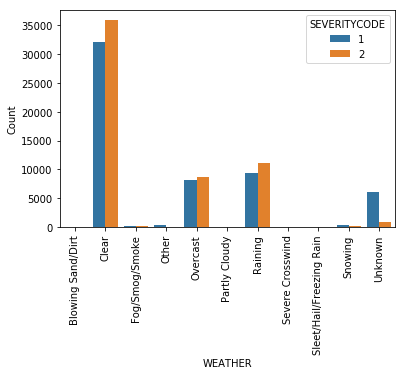

In [49]:
import seaborn as sns
p1 = sns.barplot(x='WEATHER', y= 'Count', data=df_weather, hue='SEVERITYCODE')
p1.set_xticklabels(p1.get_xticklabels(), rotation=90)
plt.show()

In [50]:
df_roadcond = pd.DataFrame(df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts())
df_roadcond.rename(columns={'SEVERITYCODE': 'Count'}, inplace=True)
df_roadcond.reset_index(inplace=True)
df_roadcond.head()

,ROADCOND,SEVERITYCODE,Count
0,Dry,2,40064
1,Dry,1,35936
2,Ice,1,405
3,Ice,2,273
4,Oil,2,24


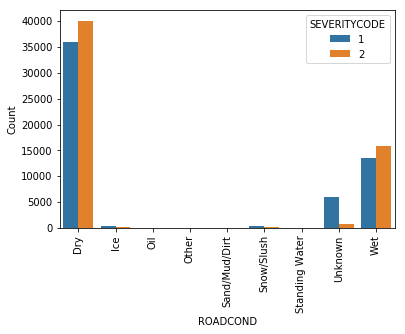

In [52]:
p2 = sns.barplot(x='ROADCOND', y= 'Count', data=df_roadcond, hue='SEVERITYCODE')
p2.set_xticklabels(p2.get_xticklabels(), rotation=90)
plt.show()

In [53]:
df_lightcond = pd.DataFrame(df.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts())
df_lightcond.rename(columns={'SEVERITYCODE': 'Count'}, inplace=True)
df_lightcond.reset_index(inplace=True)
df_lightcond.head()

,LIGHTCOND,SEVERITYCODE,Count
0,Dark - No Street Lights,1,532
1,Dark - No Street Lights,2,334
2,Dark - Street Lights Off,1,387
3,Dark - Street Lights Off,2,316
4,Dark - Street Lights On,1,14658


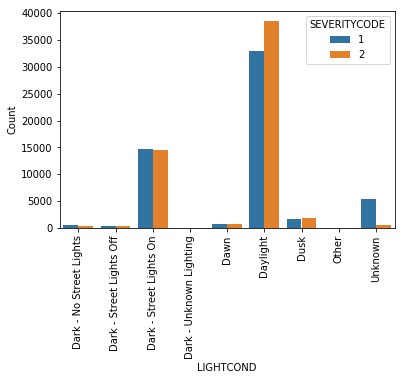

In [55]:
p3 = sns.barplot(x='LIGHTCOND', y= 'Count', data=df_lightcond, hue='SEVERITYCODE')
p3.set_xticklabels(p3.get_xticklabels(), rotation=90)
plt.show()

#### Converting

In [58]:
df.WEATHER = pd.Categorical(df.WEATHER).codes
df.ROADCOND = pd.Categorical(df.ROADCOND).codes
df.LIGHTCOND = pd.Categorical(df.LIGHTCOND).codes
df.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
25055,1,7,9,3
65280,1,2,1,6
86292,1,11,8,9
155111,1,2,1,6
64598,1,2,1,6


In [59]:
df.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize = True)

LIGHTCOND  SEVERITYCODE
0          1               0.617275
           2               0.382725
1          1               0.614319
           2               0.385681
2          1               0.550498
           2               0.449502
3          1               0.503141
           2               0.496859
4          2               0.571429
           1               0.428571
5          2               0.536808
           1               0.463192
6          2               0.539054
           1               0.460946
7          2               0.541203
           1               0.458797
8          1               0.590551
           2               0.409449
9          1               0.900198
           2               0.099802
Name: SEVERITYCODE, dtype: float64

In [60]:
df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize = True)

ROADCOND  SEVERITYCODE
0         1               0.616498
          2               0.383502
1         2               0.527158
          1               0.472842
2         1               0.597345
          2               0.402655
3         2               0.615385
          1               0.384615
4         2               0.518072
          1               0.481928
5         1               0.510638
          2               0.489362
6         1               0.683712
          2               0.316288
7         2               0.526316
          1               0.473684
8         1               0.889950
          2               0.110050
9         2               0.536359
          1               0.463641
Name: SEVERITYCODE, dtype: float64

In [61]:
df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize = True)

WEATHER  SEVERITYCODE
0        1               0.615057
         2               0.384943
1        1               0.500000
         2               0.500000
2        2               0.527478
         1               0.472522
3        2               0.526761
         1               0.473239
4        1               0.714286
         2               0.285714
5        2               0.519484
         1               0.480516
6        2               0.750000
         1               0.250000
7        2               0.542946
         1               0.457054
8        2               0.538462
         1               0.461538
9        1               0.555556
         2               0.444444
10       1               0.639241
         2               0.360759
11       1               0.880893
         2               0.119107
Name: SEVERITYCODE, dtype: float64

#### The following table shows the detail of the encoding:
| Code |WEATHER                | ROADCOND      | LIGHTCOND                |  
|--- |---                      |---            |---                       |
| 1  | Blowing Sand/Dirt       | Dry           | Dark - No Street Lights  |   
| 2  | Clear                   | Ice           | Dark - Street Lights Off |   
| 3  | Fog/Smog/Smoke          | Oil           | Dark - Street Lights On  |   
| 4  | Other                   | Other         | Dark - Unknown Lighting  |   
| 5  | Overcast                | Sand/Mud/Dirt | Dawn                     |   
| 6  | Partly Cloudy           | Snow/Slush    | Daylight                 |  
| 7  | Raining                 | Standing Water| Dusk                     |   
| 8  | Severe Crosswind        | Unknown       | Other                    |   
| 9  | Sleet/Hail/Freezing Rain| Wet           | Unknown                  |
| 10 | Snowing                 | NA            | NA                       |
| 11 | Unknown                 | NA            | NA                       |



#### Checking Missing Values:

In [62]:
df_missing = df.isna()
df_num_missing = df_missing.sum()

In [63]:
df_num_missing

SEVERITYCODE    0
WEATHER         0
ROADCOND        0
LIGHTCOND       0
dtype: int64

#### Next Step: Modeling
Our data is now ready to be fed into machine learning models. We will use the following models:

A Decision Tree, which will provide a layout of all possible outcomes so we can fully analyze the concequences of a decision.

Logistic Regression: We can use logistic regression because the data set provides two severity code outcomes, resulted in a binary data set, which is perfect for logistic regression.

## Modeling

### K-Nearest Neighbors (KNN)

In [64]:
X = df[['WEATHER','ROADCOND','LIGHTCOND']]
y = df['SEVERITYCODE'].apply(lambda x:x-1)

X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]
y[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DataConversionWarning: Data with input dtype int8 were all converted to float64 by StandardScaler.


25055     0
65280     0
86292     0
155111    0
64598     0
Name: SEVERITYCODE, dtype: int64

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

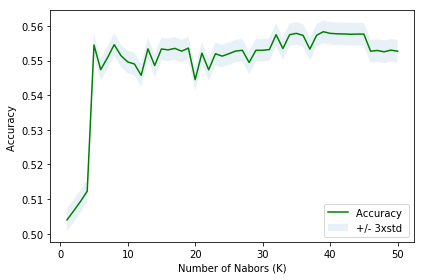

In [66]:
my_mean=np.zeros(50)
my_std = np.zeros(50)
for n in range(1,51):
    knnmodel=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    y_pred=knnmodel.predict(X_test)
    my_mean[n-1]=metrics.accuracy_score(y_test,y_pred)
    my_std[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])
    
plt.plot(range(1,51),my_mean,'g')
plt.fill_between(range(1,51),my_mean - 1 * my_std,my_mean + 1 * my_std, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [67]:
print("When k =", my_mean.argmax()+1, ", the accuracy was the best:", my_mean.max(),)

When k = 39 , the accuracy was the best: 0.5583433579652861


### Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dtmodel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [69]:
y_pred=dtmodel.predict(X_test)
TreeAccuracy=metrics.accuracy_score(y_test,y_pred)
TreeAccuracy
print("The accuracy for decision tree was:", TreeAccuracy)

The accuracy for decision tree was: 0.5621670390101392


### SVM

In [70]:
from sklearn import svm
svmmodel=svm.SVC(kernel='rbf')
svmmodel.fit(X_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [71]:
y_pred=svmmodel.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 0, 1])

In [72]:
SVMAccuracy= metrics.accuracy_score(y_test,y_pred)
print("The accuracy for SVM was:", SVMAccuracy)

The accuracy for SVM was: 0.5705877298504898


### Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lrmodel=LogisticRegression(C=0.01,solver='liblinear').fit(X_train,y_train)

In [74]:
y_pred=lrmodel.predict(X_test)
print(y_pred)
print(lrmodel.predict_proba(X_test))

[0 1 0 ... 1 1 1]
[[0.57030998 0.42969002]
 [0.47122229 0.52877771]
 [0.67060349 0.32939651]
 ...
 [0.47122229 0.52877771]
 [0.46566232 0.53433768]
 [0.47122229 0.52877771]]


In [75]:
LRAccuracy = metrics.accuracy_score(y_test,y_pred)
print("The accuracy for logistic regressionn was:", LRAccuracy)

The accuracy for logistic regressionn was: 0.5294294552328579


## Result 

In [76]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [77]:
# knn 
yhat = knnmodel.predict(X_test)
yhat
print("Train set KNN Accuracy: ", metrics.accuracy_score(y, knnmodel.predict(X)))
print("Test set KNN Accuracy: ", metrics.accuracy_score(y_test, yhat))
knn_jaccard = jaccard_similarity_score(y_test, yhat)
knn_f1_score = f1_score(y_test, yhat, average='weighted')

Train set KNN Accuracy:  0.5476644669003918
Test set KNN Accuracy:  0.5527152431689294


In [78]:
#decision tre
yhat = dtmodel.predict(X_test)
yhat
print("Train set Decission Tree Accuracy: ", metrics.accuracy_score(y, dtmodel.predict(X)))
print("Test set Decission Tree Accuracy: ", metrics.accuracy_score(y_test, yhat))
tree_jaccard = jaccard_similarity_score(y_test, yhat)
tree_f1_score = f1_score(y_test, yhat, average='weighted')

Train set Decission Tree Accuracy:  0.5596858458788754
Test set Decission Tree Accuracy:  0.5621670390101392


In [79]:
# SVM 
yhat = svmmodel.predict(X_test)
yhat
print("Train set SVM Accuracy: ", metrics.accuracy_score(y, svmmodel.predict(X)))
print("Test set SVM Accuracy: ", metrics.accuracy_score(y_test, yhat))
svm_jaccard = jaccard_similarity_score(y_test, yhat)
svm_f1_score = f1_score(y_test, yhat, average='weighted')

Train set SVM Accuracy:  0.5646439128342614
Test set SVM Accuracy:  0.5705877298504898


In [80]:
# Logistic regression 
yhat_proba = lrmodel.predict_proba(X_test)
yhat
print("Train set Logistic regression Accuracy: ", metrics.accuracy_score(y, lrmodel.predict(X)))
print("Test set Logistic regression Accuracy: ", metrics.accuracy_score(y_test, yhat))
lr_jaccard = jaccard_similarity_score(y_test, yhat)
lr_f1_score = f1_score(y_test, yhat, average='weighted')
lr_log_loss = log_loss(y_test, yhat_proba)

Train set Logistic regression Accuracy:  0.5271705506289956
Test set Logistic regression Accuracy:  0.5705877298504898


In [81]:
report = pd.DataFrame(data=np.array([["KNN", knn_jaccard, knn_f1_score, np.nan],
                                     ["Decision Tree", tree_jaccard, tree_f1_score, np.nan],
                                     ["SVM", svm_jaccard, svm_f1_score, np.nan],
                                    ["LogisticRegression", lr_jaccard, lr_f1_score, lr_log_loss]]), 
                      columns=["Algorithm", "Jaccard", "F1-score", "LogLoss"])
report = report.set_index(["Algorithm", "Jaccard", "F1-score", "LogLoss"])
report

,,,
Algorithm,Jaccard,F1-score,LogLoss
KNN,0.5527152431689294,0.5518364129499082,nan
Decision Tree,0.5621670390101392,0.4808694306282786,nan
SVM,0.5705877298504898,0.5469157414553079,nan
LogisticRegression,0.5705877298504898,0.5469157414553079,0.6844125103805109


## Discussion

From the previous models and results, we can see that among all of the machine algroithms we have tested, K-Nearest-Neighbors is the best algorithm to predict the severity of accidents given the conditions.

## Conclusion

We can conclude that particular conditions have a some impact on whether or not travel could result in property damage or injury.